In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import tree, metrics
from sklearn.grid_search import GridSearchCV
import sklearn.grid_search

In [1]:
from sklearn.datasets import load_digits

In [34]:
def write_ans (answer, name):
    """Writing answer 'answer' to the file with name 'name'"""
    with open(name, 'w') as fout:
        fout.write(str(answer))

In [2]:
dset = load_digits()

In [5]:
dset.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [6]:
dset.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [8]:
dset.images.shape

(1797, 8, 8)

In [9]:
dset.data.shape

(1797, 64)

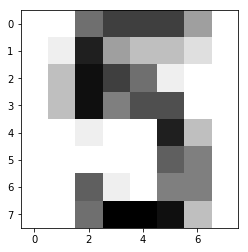

In [17]:
plt.imshow(dset.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
X = dset.data
y = dset.target

In [70]:
#Init. default DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
cross_v_score = cross_val_score(tree_clf, X, y, cv = 10)
ans_1 = cross_v_score.mean()
ans_1

0.83478096496003906

In [42]:
# Write answer 1

write_ans(ans_1, 'ans1.txt')

In [49]:
%%time
# Bagging classifier with 100 trees

bagging_clf = BaggingClassifier(n_estimators=100)
cross_v_score_bagging = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=(-1))
ans_2 = cross_v_score_bagging.mean()

CPU times: user 160 ms, sys: 66.1 ms, total: 226 ms
Wall time: 7.72 s


In [50]:
ans_2

0.92822209223136876

In [52]:
# Write answer 2

write_ans(ans_2, 'ans2.txt')

In [64]:
# q = sqrt(d) - tunung q for classification case

q = int((np.sqrt(X.shape[1])))

In [65]:
%%time
# Bagging classifier with tuned 'q' = sqrt(d)

bagging_tun_q_clf = BaggingClassifier(n_estimators=100, max_features = q)
cross_v_score_tuned_bagging = cross_val_score(bagging_tun_q_clf, X, y, cv=10, n_jobs=(-1))
ans_3 = cross_v_score_tuned_bagging.mean()

CPU times: user 156 ms, sys: 45.2 ms, total: 201 ms
Wall time: 2.69 s


In [66]:
ans_3

0.92716532982148914

In [67]:
# Write answer 3

write_ans(ans_3, 'ans3.txt')

In [116]:
#Bagging with tuned q per every tree

bagging_tree_tun_q_clf = BaggingClassifier(tree.DecisionTreeClassifier(max_features=q), n_estimators=100)
cross_v_score_bgg_tree_tun_q = cross_val_score(bagging_tree_tun_q_clf, X, y, cv=10)
ans_4 = cross_v_score_bgg_tree_tun_q.mean()

In [117]:
ans_4

0.95440022124643098

In [118]:
# Write answer 4

write_ans(ans_4, 'ans4.txt')

In [201]:
# Random forest algorithm estimation comparing with Bagging with tuned q of every tree

random_forest_clf = RandomForestClassifier(n_jobs = (-1), n_estimators=100, max_depth=30)

In [202]:
cross_v_score_RF = cross_val_score(random_forest_clf, X, y, cv=10, n_jobs=(-1))
ans_5 = cross_v_score_RF.mean()

In [203]:
ans_5

0.95610429712099609

In [204]:
write_ans('2 3 4 7', 'ans5.txt')